##1. Seting Environment

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init("/content/spark-2.4.5-bin-hadoop2.7")
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

##2. Upload Dataset ke Direktori Colab

In [ ]:
from google.colab import files
files.upload()

Saving COVID-19-geographic-disbtribution-worldwide.csv to COVID-19-geographic-disbtribution-worldwide (2).csv


{'COVID-19-geographic-disbtribution-worldwide.csv': b'dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp\r\n5/4/2020,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia\r\n5/3/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386,Asia\r\n5/2/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386,Asia\r\n5/1/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/30/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia\r\n4/29/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia\r\n4/28/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia\r\n4/27/2020,27,4,2020,68,10,Afghanistan,AF,AFG,37172386,Asia\r\n4/26/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/25/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386,Asia\r\n4/24/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386,Asia\r\n4/23/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/22/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386,Asia\r\n4/21/2020,21,4,2020,35,2,Afghanista

##3. Melihat Data

In [ ]:
import pandas as pd
datacsv = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv')

from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
datacsv.to_sql('data_table', engine)

# Seluruh Data
res = pd.read_sql_query('Select * from data_table',engine)

from google.colab import data_table
data_table.DataTable(res, include_index=False, num_rows_per_page=10)

##4. Visualisasi Data

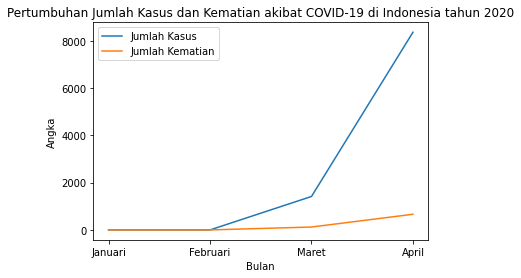

In [ ]:
import matplotlib.pyplot as plt
resIndo = pd.read_sql_query('Select countriesAndTerritories, month, sum(cases) as total_cases, sum(deaths) as total_deaths from data_table where geoId = "ID" and year = 2020 and month < 5 group by countriesAndTerritories, month',engine)
bulan = ['Januari','Februari','Maret','April']
plt.plot(bulan,resIndo[:]['total_cases'], label='Jumlah Kasus')
plt.plot(bulan,resIndo[:]['total_deaths'], label='Jumlah Kematian')
plt.xlabel('Bulan')
plt.ylabel('Angka')
plt.title('Pertumbuhan Jumlah Kasus dan Kematian akibat COVID-19 di Indonesia tahun 2020')
plt.legend()
plt.show()

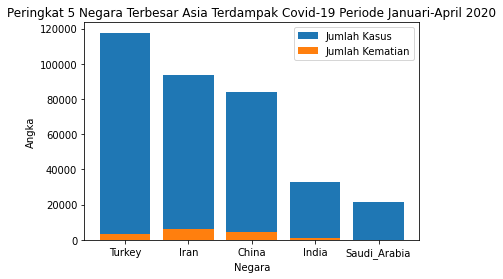

In [ ]:
resAsiaTop5 = pd.read_sql_query('Select countriesAndTerritories, month, sum(cases) as total_cases, sum(deaths) as total_deaths from data_table where continentExp = "Asia" and year = 2020 and month < 5 group by countriesAndTerritories order by total_cases desc limit 5',engine)
plt.bar(resAsiaTop5[:]['countriesAndTerritories'], resAsiaTop5[:]['total_cases'], label="Jumlah Kasus")
plt.bar(resAsiaTop5[:]['countriesAndTerritories'], resAsiaTop5[:]['total_deaths'], label="Jumlah Kematian")
plt.xlabel("Negara")
plt.ylabel("Angka")
plt.title("Peringkat 5 Negara Terbesar Asia Terdampak Covid-19 Periode Januari-April 2020")
plt.legend()
plt.show()

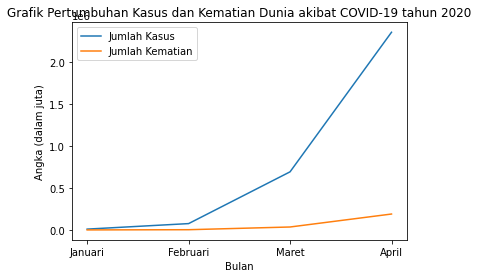

In [ ]:
resWorldMonth = pd.read_sql_query('Select month, sum(cases) as total_cases, sum(deaths) as total_deaths from data_table where year = 2020 and month < 5 group by month order by total_cases asc',engine)
plt.plot(['Januari','Februari','Maret','April'], resWorldMonth[:]['total_cases'], label="Jumlah Kasus")
plt.plot(['Januari','Februari','Maret','April'], resWorldMonth[:]['total_deaths'], label="Jumlah Kematian")
plt.xlabel("Bulan")
plt.ylabel("Angka (dalam juta)")
plt.title("Grafik Pertumbuhan Kasus dan Kematian Dunia akibat COVID-19 tahun 2020")
plt.legend()
plt.show()

##Negara Dengan Kasus COVID-19 Terbanyak di Dunia

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv')
dataset.head()

dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0   5/4/2020    4      5  ...                   AFG   37172386.0          Asia
1   5/3/2020    3      5  ...                   AFG   37172386.0          Asia
2   5/2/2020    2      5  ...                   AFG   37172386.0          Asia
3   5/1/2020    1      5  ...                   AFG   37172386.0          Asia
4  4/30/2020   30      4  ...                   AFG   37172386.0          Asia

[5 rows x 11 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


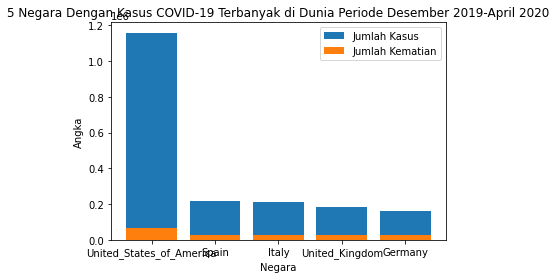

In [22]:
casesAndDeaths = dataset.groupby("countriesAndTerritories")["cases", "deaths"].sum()
casesAndDeaths.reset_index(level=0, inplace=True)

topFiveWorldMostCases = casesAndDeaths["cases"].sort_values(ascending=False).head()
topFiveWorldMostCasesDeath = casesAndDeaths["deaths"].sort_values(ascending=False).head()
topFiveWorldMostCasesCountry = casesAndDeaths.nlargest(5,['cases'])

plt.bar(topFiveWorldMostCasesCountry['countriesAndTerritories'], topFiveWorldMostCases, label="Jumlah Kasus")
plt.bar(topFiveWorldMostCasesCountry['countriesAndTerritories'], topFiveWorldMostCasesDeath, label="Jumlah Kematian")
plt.xlabel("Negara")
plt.ylabel("Angka")
plt.title("5 Negara Dengan Kasus COVID-19 Terbanyak di Dunia Periode Desember 2019-April 2020")
plt.legend()
plt.show()

##**Cluster Analysis Berdasarkan Total Kasus and Total Kematian Menggunakan Algoritma K-Means**

In [23]:
#Ngambil nilai Cases dan Deaths
X = casesAndDeaths.iloc[:, [1, 2]].values
print(X)

[[   2704      85]
 [    795      31]
 [   4474     463]
 [    748      45]
 [     35       2]
 [      3       0]
 [     25       3]
 [   4770     246]
 [   2386      35]
 [    100       2]
 [   6801      95]
 [  15597     598]
 [   1932      25]
 [     83      11]
 [   3383       8]
 [   9455     177]
 [     82       7]
 [  16705      99]
 [  49906    7844]
 [     18       2]
 [     90       2]
 [    115       7]
 [      7       0]
 [   1594      76]
 [      6       0]
 [   1857      77]
 [     23       1]
 [ 101147    7025]
 [      6       1]
 [    138       1]
 [   1618      73]
 [    662      45]
 [     19       1]
 [    122       0]
 [   2077      64]
 [  59474    3682]
 [    165       2]
 [    696       7]
 [     74       1]
 [     72       0]
 [    117      10]
 [  19663     260]
 [  83964    4637]
 [   7668     340]
 [      3       0]
 [    229      10]
 [    739       6]
 [   1398      17]
 [   2096      79]
 [   1649      67]
 [     16       1]
 [    872      20]
 [   7781   

##Menerapkan Elbow Method Untuk Menentukan Jumlah Cluster

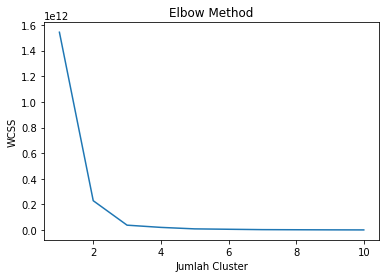

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

##Membuat K-Means Model pada Dataset

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# Dataframe baru bernama cluster
cluster = pd.DataFrame(y_kmeans1)

# Masukkan dataframe cluster ke dalam dataset
casesAndDeaths['cluster'] = cluster

#Menampilkan Persebaran Negara Tiap Cluster
grouping = casesAndDeaths.groupby('cluster')['countriesAndTerritories']
for key, item in grouping:
    print("Cluster "+str(key))
    print(grouping.get_group(key), "\n\n")

Cluster 1
0         Afghanistan
1             Albania
2             Algeria
3             Andorra
4              Angola
            ...      
204           Vietnam
205    Western_Sahara
206             Yemen
207            Zambia
208          Zimbabwe
Name: countriesAndTerritories, Length: 198, dtype: object 


Cluster 2
200    United_States_of_America
Name: countriesAndTerritories, dtype: object 


Cluster 3
27             Brazil
42              China
70             France
75            Germany
94               Iran
99              Italy
158            Russia
178             Spain
192            Turkey
197    United_Kingdom
Name: countriesAndTerritories, dtype: object 




##Visualisasi Cluster

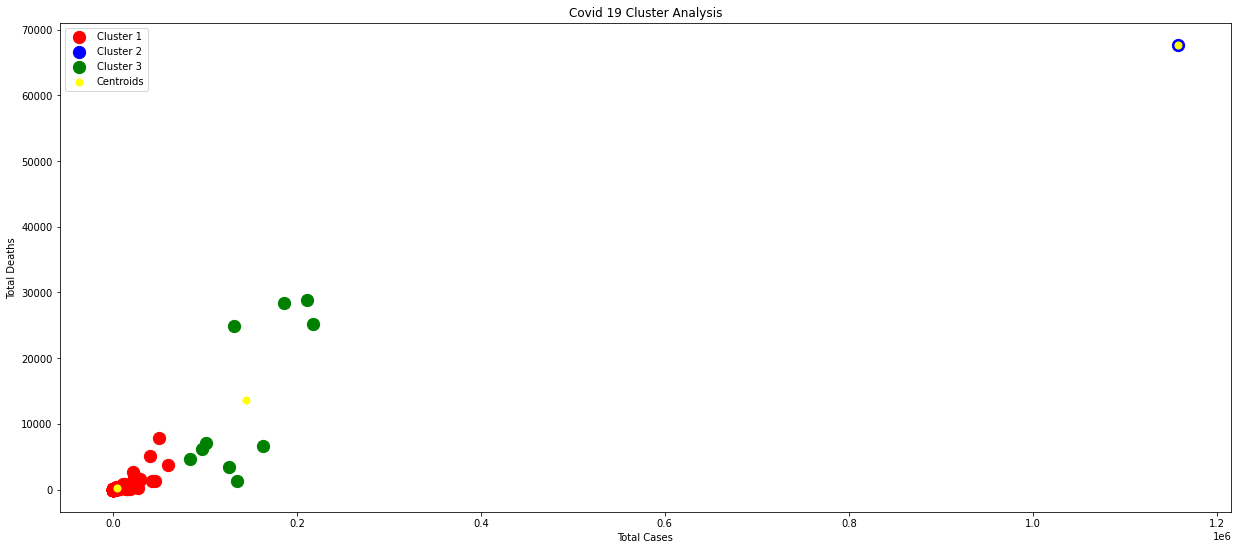

In [28]:
fig, ax = plt.subplots(figsize=(21,9))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 150, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 150, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Covid 19 Cluster Analysis')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

# Prediksi Linear Regresi

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv')
df.head()

dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0   5/4/2020    4      5  ...                   AFG   37172386.0          Asia
1   5/3/2020    3      5  ...                   AFG   37172386.0          Asia
2   5/2/2020    2      5  ...                   AFG   37172386.0          Asia
3   5/1/2020    1      5  ...                   AFG   37172386.0          Asia
4  4/30/2020   30      4  ...                   AFG   37172386.0          Asia

[5 rows x 11 columns]

### Seleksi Dataframe hanya negara Indonesia

In [2]:
df_indo = df[df.countriesAndTerritories == 'Indonesia']
df_indo

dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
6472    5/4/2020    4      5  ...                   IDN  267663435.0          Asia
6473    5/3/2020    3      5  ...                   IDN  267663435.0          Asia
6474    5/2/2020    2      5  ...                   IDN  267663435.0          Asia
6475    5/1/2020    1      5  ...                   IDN  267663435.0          Asia
6476   4/30/2020   30      4  ...                   IDN  267663435.0          Asia
...          ...  ...    ...  ...                   ...          ...           ...
6586    1/4/2020    4      1  ...                   IDN  267663435.0          Asia
6587    1/3/2020    3      1  ...                   IDN  267663435.0          Asia
6588    1/2/2020    2      1  ...                   IDN  267663435.0          Asia
6589    1/1/2020    1      1  ...                   IDN  267663435.0          Asia
6590  12/31/2019   31     12  ...                   IDN  267663435.0          Asia

[119 rows x 11 columns]

### Visualisasi data Kematian dengan Kasus

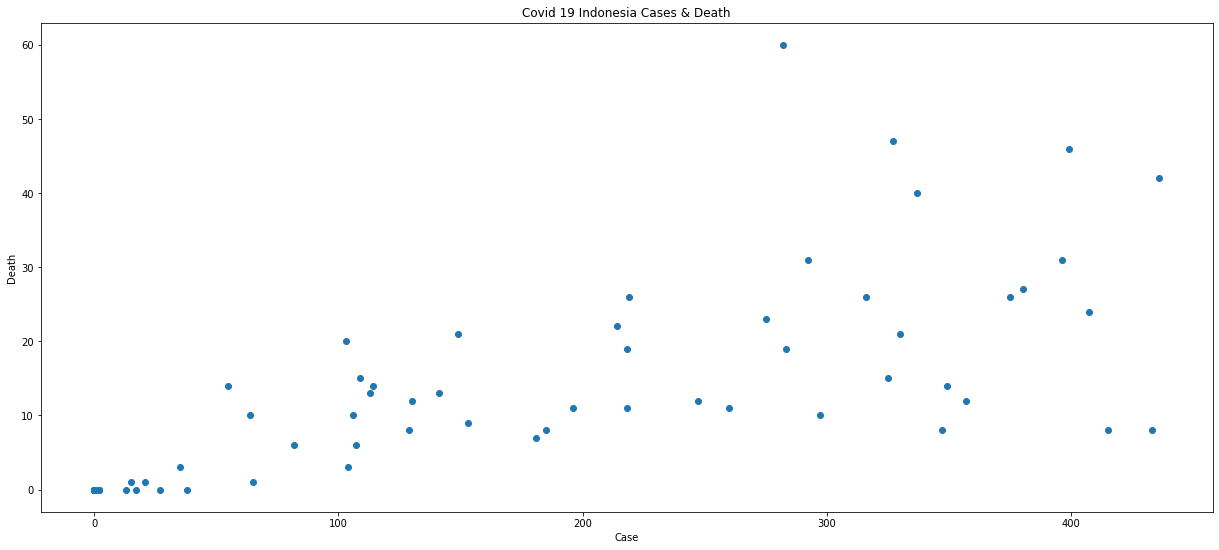

In [3]:
death = df_indo['deaths']
cases = df_indo['cases']
fig, ax = plt.subplots(figsize=(21,9))
plt.scatter(cases,death)
plt.title('Covid 19 Indonesia Cases & Death')
plt.xlabel('Case')
plt.ylabel('Death')
plt.show()

### Model mempelajari data dengan Linear Regresi

In [19]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(cases[:,np.newaxis], death)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_lr.coef_

In [ ]:
model_lr.intercept_

### Membuat Prediksi dengan angka kasus lebih tinggi

In [6]:
x_test = np.linspace(400,1000,20)
x_test = x_test[:,np.newaxis]

In [7]:
y_test = model_lr.predict(x_test)
y_test

array([28.61995335, 30.84107402, 33.0621947 , 35.28331537, 37.50443605,
       39.72555673, 41.9466774 , 44.16779808, 46.38891875, 48.61003943,
       50.8311601 , 53.05228078, 55.27340145, 57.49452213, 59.7156428 ,
       61.93676348, 64.15788415, 66.37900483, 68.6001255 , 70.82124618])

In [8]:
y_train = model_lr.predict(cases[:,np.newaxis])

### Visualisasi hasil Prediksi

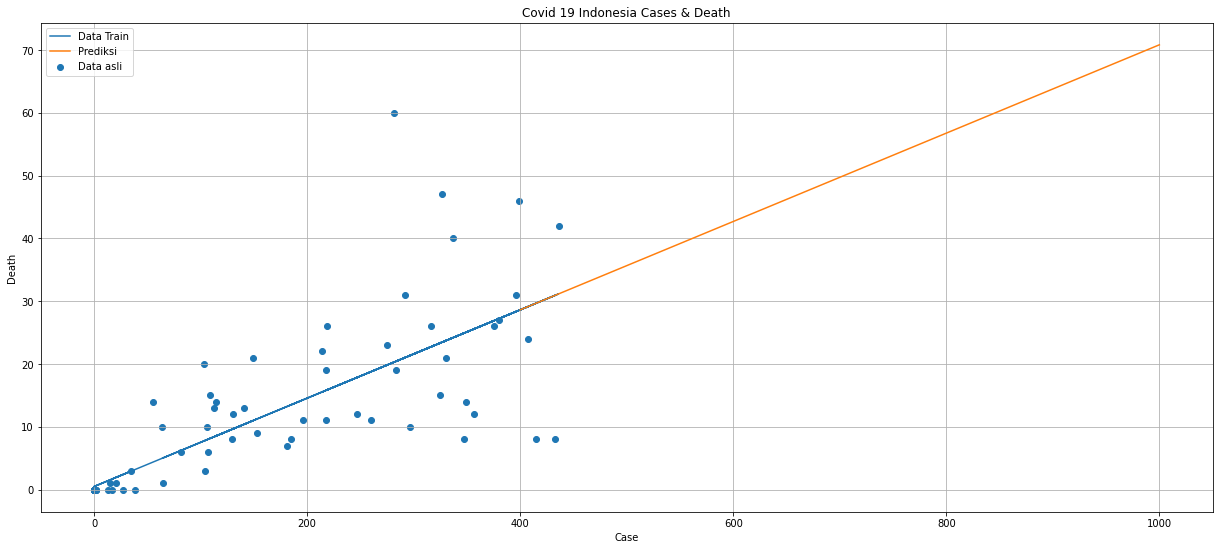

In [9]:
fig, ax = plt.subplots(figsize=(21,9))
plt.scatter(cases,death, label='Data asli')
plt.plot(cases,y_train, label='Data Train')
plt.plot(x_test,y_test, label='Prediksi')
plt.title('Covid 19 Indonesia Cases & Death')
plt.xlabel('Case')
plt.ylabel('Death')
plt.legend()
plt.grid()
plt.show()